# Binary Classification

In [ ]:
%%capture
!pip install ipython-autotime

In [ ]:
import time
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras import layers

## 1- Data preparation

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0]

1

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
%load_ext autotime

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

time: 6.1 s (started: 2023-08-14 20:47:03 +00:00)


In [ ]:
%unload_ext autotime

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
train_labels.dtype

dtype('int64')

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train.dtype

dtype('float32')

## 2- Model Design

In [ ]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## 3- Training

In [ ]:
%load_ext autotime

time: 359 µs (started: 2023-08-14 20:45:06 +00:00)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

start = time.time()
history = model.fit(x=partial_x_train, y=partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val))
end = time.time()
print(f'Execution time: {end-start} s')

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.7259 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 2s 71ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7810 - val_accuracy: 0.8633
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8217 - val_accuracy: 0.8641
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 7.9775e-04 - accuracy: 1.0000 - val_loss: 0.8588 - val_accuracy: 0.8642
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 5.6046e-04 - accuracy: 1.0000 - val_loss: 0.8863 - val_accuracy: 0.8639
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 4.2542e-04 - accuracy: 1.0000 - val_loss: 0.9129 - val_accuracy: 0.8635
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 3.3827e-04 - accuracy: 1.0000 - val_loss: 0.9389 - val_accuracy: 0.86

In [ ]:
%unload_ext autotime

## 4- Evaluation

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

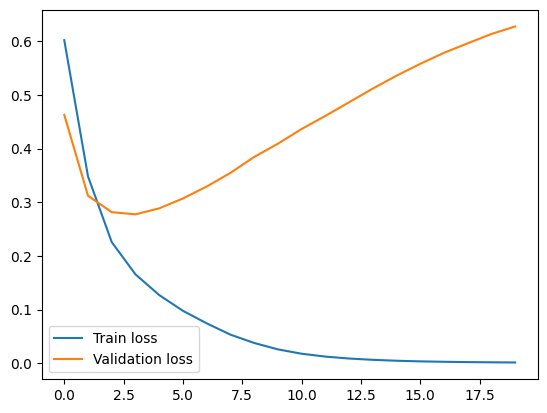

In [ ]:
import matplotlib.pyplot as plt

losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

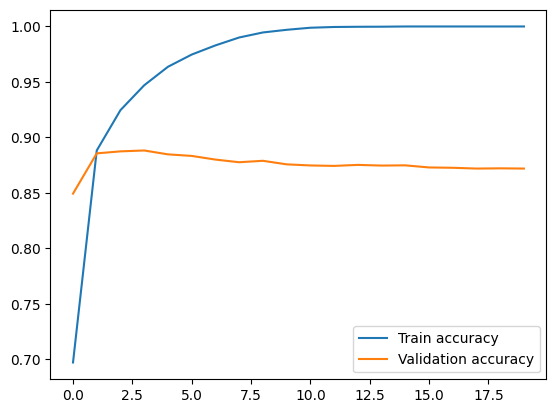

In [ ]:
accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

plt.plot(accuracies, label='Train accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.6653 - accuracy: 0.8614


[0.6653433442115784, 0.8614400029182434]

In [ ]:
preds = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
preds

array([[0.00496731],
       [1.        ],
       [0.9436734 ],
       ...,
       [0.0023348 ],
       [0.00162342],
       [0.64528555]], dtype=float32)

In [ ]:
preds[preds<0.5] = 0
preds[preds>=0.5] = 1
preds

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.86      0.87      0.86     12500
    Positive       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

